# Summary
Small businesses do not always have a way to compete with large companies who have resources and
capital to promote their products. The sharing of content similar to word of mouth is one of the best
and cheapest ways to promote and sell products. Therefore the emergence of live videos have made it
possible for small businesses to gain back an edge by offering personalised experiences that
encourage the promotion and buying of their goods. A clustering algorithm called k-means was found
to be the best at discovering highly engaging live videos so that they could be qualitatively and
quantitatively analysed. It further revealed that the number of reactions does not directly correlate to
shares. The findings are optimistic for small sellers who can use their personal brand to offer a more
direct service to consumers through instant live streaming. The implications of the clustering also
showcase its possible usage to discover new types of highly engaging content for sellers to take
advantage of.

In [20]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "chinalivestream.png", width=150, height=150)


<a href="https://twitter.com/mbrennanchina/status/1175749242071080960">Funny Video showing what livestreaming is like in China</a>




# Loading, Cleaning and Checking the Data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
Live= pd.read_csv('Live.csv')
Live.head() # columns need a little cleaning

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [2]:
Live.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
status_id           7050 non-null object
status_type         7050 non-null object
status_published    7050 non-null object
num_reactions       7050 non-null int64
num_comments        7050 non-null int64
num_shares          7050 non-null int64
num_likes           7050 non-null int64
num_loves           7050 non-null int64
num_wows            7050 non-null int64
num_hahas           7050 non-null int64
num_sads            7050 non-null int64
num_angrys          7050 non-null int64
Column1             0 non-null float64
Column2             0 non-null float64
Column3             0 non-null float64
Column4             0 non-null float64
dtypes: float64(4), int64(9), object(3)
memory usage: 881.3+ KB


In [3]:
Live['status_type'].value_counts()

photo     4288
video     2334
status     365
link        63
Name: status_type, dtype: int64

In [4]:
Live.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,NaN,NaN,NaN,NaN


In [5]:
Live[Live['num_reactions']== 4710]
# the maximum number for number of reaction looks wrong due to likes having the same number but on further inspection, this particular photo did not receive any other type of reaction)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
1229,246675545449582_735701483213650,photo,4/10/2015 6:31,4710,50,1,4710,0,0,0,0,0,NaN,NaN,NaN,NaN


In [6]:
# if i onehote encode the status type might be able to visualise it or add statustype to pca
dummies_status_type = pd.get_dummies(Live['status_type']) # Dummy columns for region
dummies_status_type = dummies_status_type.rename(index=int, columns={1: "photo", 2: "video", 3: "status", 4: "link"})
dummies_status_type.head()

,link,photo,status,video
0,0,0,0,1
1,0,1,0,0
2,0,0,0,1
3,0,1,0,0
4,0,1,0,0


In [7]:
# delete unwanted collumns
Live = Live.drop(["Column1", "Column2", "Column3", "Column4"], axis=1) # these columns came with the dataset but contained nothing inside
Live = Live.drop(['status_id'], axis = 1) # we already have status_published extracted, id is not useful

In [8]:
Live.notnull().all() # check for null values

status_type         True
status_published    True
num_reactions       True
num_comments        True
num_shares          True
num_likes           True
num_loves           True
num_wows            True
num_hahas           True
num_sads            True
num_angrys          True
dtype: bool

In [9]:
print(Live.head())
Live_cleaned = Live

  status_type status_published  num_reactions  num_comments  num_shares  \
0       video   4/22/2018 6:00            529           512         262   
1       photo  4/21/2018 22:45            150             0           0   
2       video   4/21/2018 6:17            227           236          57   
3       photo   4/21/2018 2:29            111             0           0   
4       photo   4/18/2018 3:22            213             0           0   

   num_likes  num_loves  num_wows  num_hahas  num_sads  num_angrys  
0        432         92         3          1         1           0  
1        150          0         0          0         0           0  
2        204         21         1          1         0           0  
3        111          0         0          0         0           0  
4        204          9         0          0         0           0  


In [10]:
# manipulating status published for year, month and time of post
Live['status_published'] = pd.to_datetime(Live['status_published']) # change to date time type

# year
Live['status_published'] = Live['status_published'].astype(str)
start, stop, step = 0, 4, 1 # slice first 4 digits by 1
Live['year'] = Live['status_published'].str.slice(start, stop, step)

# month
start, stop, step = 5, 7, 1 # slice first 4 digits by 1
Live['month'] = Live['status_published'].str.slice(start, stop, step)

# hour
start, stop, step = 11, 13, 1 # slice first 4 digits by 1
Live['hour'] = Live['status_published'].str.slice(start, stop, step)

# qtr
Live['qtr'] = pd.to_datetime(Live['status_published']).dt.quarter


# Exploring variables with descriptive statistics and graphs

1. Status type

photo     4288
video     2334
status     365
link        63
Name: status_type, dtype: int64


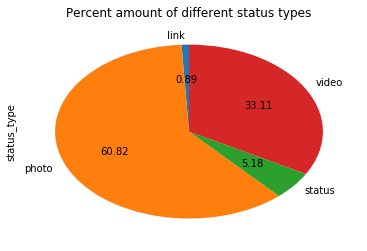

In [11]:
# descriptive statistics)
Live_status_type = Live.groupby('status_type')
Live_status_type['status_type'].count().plot(kind = 'pie', startangle = 90, autopct = '%.2f')
plt.title('Percent amount of different status types')

print(Live['status_type'].value_counts())

2. Number of reactions

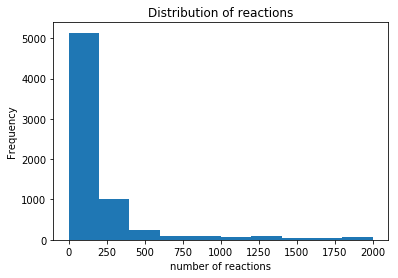

count    7050.000000
mean      230.117163
std       462.625309
min         0.000000
25%        17.000000
50%        59.500000
75%       219.000000
max      4710.000000
Name: num_reactions, dtype: float64

In [162]:
Live[Live['num_reactions'] < 2000].num_reactions.plot(kind = 'hist')
plt.xlabel('number of reactions')
plt.title('Distribution of reactions')
plt.show()

Live['num_reactions'].describe()

3. Number of comments

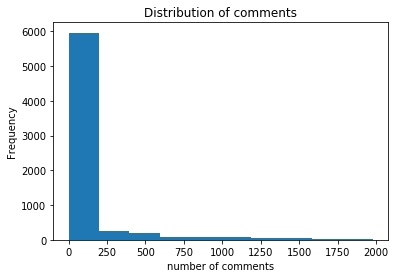

count     7050.000000
mean       224.356028
std        889.636820
min          0.000000
25%          0.000000
50%          4.000000
75%         23.000000
max      20990.000000
Name: num_comments, dtype: float64

In [160]:
Live[Live['num_comments'] < 2000].num_comments.plot(kind = 'hist')
plt.xlabel('number of comments')
plt.title('Distribution of comments')
plt.show()

Live['num_comments'].describe()

4. Number of shares

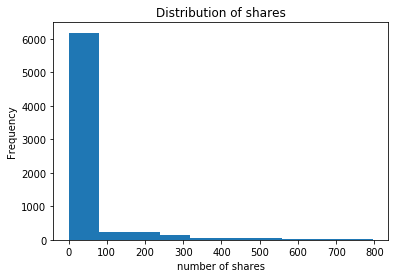

count    7050.000000
mean       40.022553
std       131.599965
min         0.000000
25%         0.000000
50%         0.000000
75%         4.000000
max      3424.000000
Name: num_shares, dtype: float64

In [133]:
Live[Live['num_shares'] < 800].num_shares.plot(kind = 'hist')
plt.xlabel('number of shares')
plt.title('Distribution of shares')
plt.show()

Live['num_shares'].describe()

5. Number of likes

count    7050.000000
mean      215.043121
std       449.472357
min         0.000000
25%        17.000000
50%        58.000000
75%       184.750000
max      4710.000000
Name: num_likes, dtype: float64

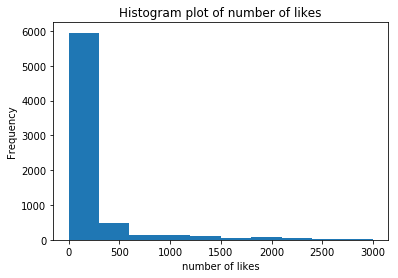

In [158]:
Live[Live['num_likes'] < 3000].num_likes.plot(kind = 'hist')
plt.xlabel('number of likes')
plt.title('Histogram plot of number of likes')

Live['num_likes'].describe()

6. Hour - not many posts are in the afternoon between 12pm - 8pm

Text(0.5,1,'number of live seller posts by hour')

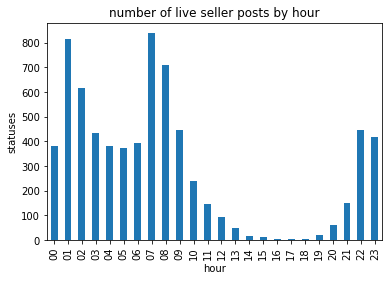

In [16]:
Live_hour = Live.groupby('hour')
Live_hour['hour'].count().plot(kind = 'bar')
plt.xlabel('hour')
plt.ylabel('statuses')
plt.title('number of live seller posts by hour')

# not many posts are in the afternoon from 12 - 8pm

7. Time of day - Lets explore this in an easy to read pie graph

In [17]:
# manipulating hour to night,midday or morning as 24 categorical hours is too many
Live['hour'] = Live['hour'].astype(str)
Live['hour'] = Live['hour'].replace('00', 'night')
Live['hour'] = Live['hour'].replace('01', 'night')
Live['hour'] = Live['hour'].replace('02', 'night')
Live['hour'] = Live['hour'].replace('03', 'night')
Live['hour'] = Live['hour'].replace('04', 'night')
Live['hour'] = Live['hour'].replace('05', 'morning')
Live['hour'] = Live['hour'].replace('06', 'morning')
Live['hour'] = Live['hour'].replace('07', 'morning')
Live['hour'] = Live['hour'].replace('08', 'morning')
Live['hour'] = Live['hour'].replace('09', 'morning')
Live['hour'] = Live['hour'].replace('10', 'morning')
Live['hour'] = Live['hour'].replace('11', 'midday')
Live['hour'] = Live['hour'].replace('12', 'midday')
Live['hour'] = Live['hour'].replace('13', 'midday')
Live['hour'] = Live['hour'].replace('14', 'midday')
Live['hour'] = Live['hour'].replace('15', 'midday')
Live['hour'] = Live['hour'].replace('16', 'midday')
Live['hour'] = Live['hour'].replace('17', 'midday')
Live['hour'] = Live['hour'].replace('18', 'midday')
Live['hour'] = Live['hour'].replace('19', 'night')
Live['hour'] = Live['hour'].replace('20', 'night')
Live['hour'] = Live['hour'].replace('21', 'night')
Live['hour'] = Live['hour'].replace('22', 'night')
Live['hour'] = Live['hour'].replace('23', 'night')
Live['hour'] = Live['hour'].replace('24', 'night')

night      3719
morning    3001
midday      330
Name: hour, dtype: int64

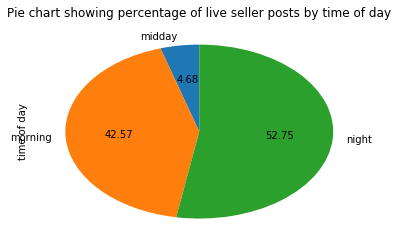

In [18]:
Live_hour = Live.groupby('hour')
Live_hour['hour'].count().plot(kind = 'pie', startangle = 90, autopct = '%.2f')
plt.ylabel('time of day')
plt.title('Pie chart showing percentage of live seller posts by time of day')


Live['hour'].value_counts()

8. Month - December has the most posts.  maybe it is a good time to target people due to public holidays

12    823
05    733
11    674
03    666
04    635
06    604
01    585
02    513
08    499
09    486
10    485
07    347
Name: month, dtype: int64

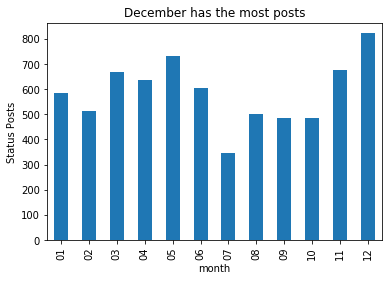

In [19]:
# number of posts by month

Live_month = Live.groupby('month')
Live_month['month'].count().sort_values()
Live_month['month'].count().plot(kind = 'bar')
plt.ylabel('Status Posts')
plt.title('December has the most posts')

Live['month'].value_counts()

9. Year 

2018    2550
2017    2253
2012     589
2016     588
2013     500
2015     337
2014     233
Name: year, dtype: int64

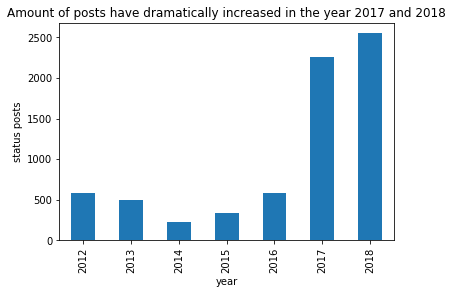

In [20]:
# number of posts by year

Live_year = Live.groupby('year')
Live_year['year'].count().sort_values()
Live_year['year'].count().plot(kind = 'bar')
plt.ylabel('status posts')
plt.title('Amount of posts have dramatically increased in the year 2017 and 2018')


Live['year'].value_counts()

# Explore the relationship between pairs of attributes

Hypothesis 1: It was hypothesised that there would be a positive association between the number of comments and number of reactions.

This is somewhat supported but the pattern is not linear.

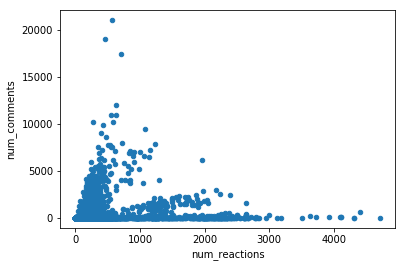

In [21]:
Live.plot(kind = 'scatter', x = 'num_reactions', y = 'num_comments')

Hypothesis 2: It was hypothesised that there would be a positive association between the number of angrys and comments because the posts that trigger angry thoughts towards people will have people responding to show the frustration.

This was actually found to have the opposite relationship possible because angrys are not used literally but more ironically. Another reasoning may be because people do not speak their mind but only react to it. 

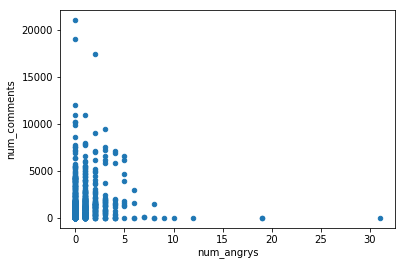

In [22]:
Live.plot(kind = 'scatter', x = 'num_angrys', y = 'num_comments')

Hypothesis 3: Hypothesised that there is a strong positive relationship between number of reactions and number of likes as they make up most of the reactions 

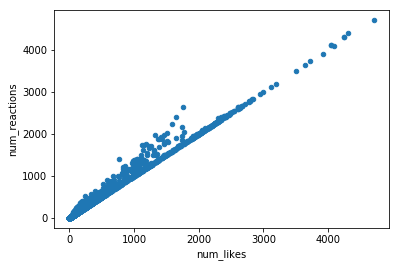

In [23]:
Live.plot(kind = 'scatter', x = 'num_likes', y = 'num_reactions')

Hypothesis 4: Previous studies have proposed that videos actually have the highest number of shares. Therefore it was hypothesised that the number of shares is largers in videos compared to photos. 

The hypothesis was supported as the majority of photos have less than 10 shares

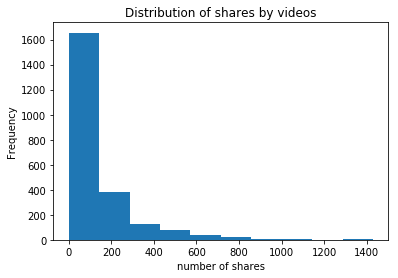

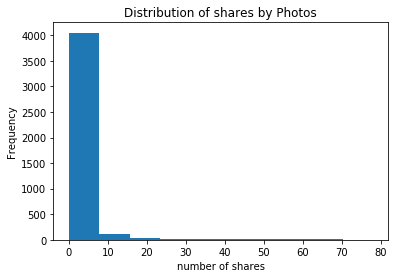

In [140]:
Live_video = Live[Live['status_type'] == 'video'] # filter rows with videos
Live_photo = Live[Live['status_type'] == 'photo'] # filter rows with photos
# 
Live_video[Live_video['num_shares'] < 1600].num_shares.plot(kind = 'hist')
plt.xlabel('number of shares')
plt.title('Distribution of shares by videos')
plt.show()

Live_photo[Live_photo['num_shares'] < 80].num_shares.plot(kind = 'hist')
plt.xlabel('number of shares')
plt.title('Distribution of shares by Photos')
plt.show()

Hypothesis 5: The previous finding disocovered that live videos are superior for the number of shares. However it is believed that photos are still a useful medium over other types of statuses for increased shares. It is therefore hypothesised that links and statuses have the lowest amount of shares when used for selling. 

This hypothesis was not supported because links showed higher amounts of shares than photos.


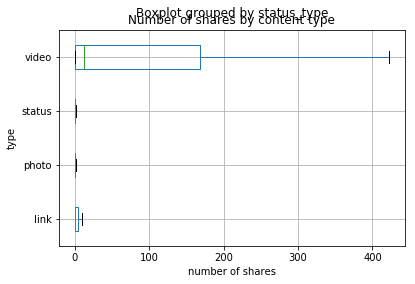

In [25]:
Live.boxplot(column = 'num_shares', by = 'status_type', showfliers= False, vert=False)  # without outliers
plt.xlabel('number of shares')
plt.ylabel('type')
plt.title('Number of shares by content type')
plt.show()


Hypothesis 6: Photos are believed to have more reactions because of their accessibility compared to videos. It is therefore hypothesised that photos will have higher number of reactions compared to videos.

This was found not to be the case, perhaps because live videos invoke more emotional feedback. 

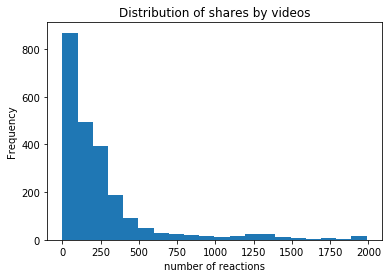

(38L,)
38 observations were filtered in the above histogram to display the distribution in finer detail


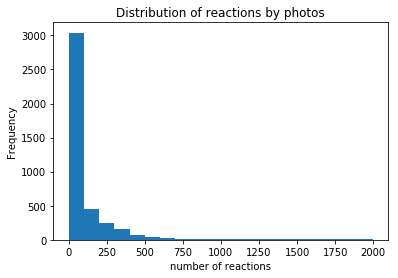

In [156]:
# different way using loc. Select which row then which column
# increase number of bins to see more fine grain detail
Live_video.loc[Live_video['num_reactions'] < 2000, 'num_reactions'].plot(kind = 'hist', bins = 20)
plt.xlabel('number of reactions')
plt.title('Distribution of shares by videos')
plt.show()

print(Live_video.loc[Live_video['num_reactions']  > 2000, 'num_reactions'].shape)
print('38 observations were filtered in the above histogram to display the distribution in finer detail')

Live_photo[Live_photo['num_reactions'] < 2000].num_reactions.plot(kind = 'hist', bins = 20)
plt.xlabel('number of reactions')
plt.title('Distribution of reactions by photos')
plt.show()


Hypothesis 7: By breaking down the types of reactions, we can see in a more detailed manner the type of content that is being reacted to. It is hypothesised that photos would have the most likes due to the previous belief of their ease of accessibility.

Status actually displaydd the highest amount of likes on average while photos displayed the least

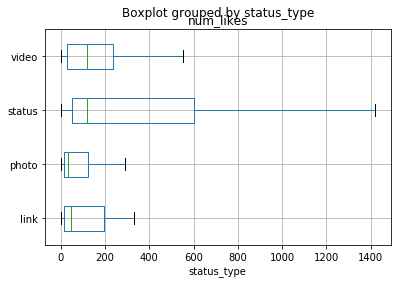

In [27]:
# boxplots are also a good way to show the dsitribution
Live.boxplot(column = 'num_likes', by = 'status_type', showfliers= False, vert=False)


Hypothesis 8: Hypothesised that the surge in live videos over the years has also resulted in the growth of shares

This is supported because the other status types have not shown much growth over the years but shares have been shown to increase.

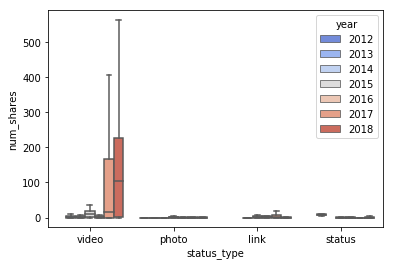

In [28]:
import seaborn as sns
sns.boxplot(x="status_type",y="num_shares",hue="year",data=Live, palette="coolwarm", showfliers= False)

Hypothesis 9: Positive correlation between the number of sads and angrys because they both evoke negative responses.

The relationship is difficult to determine due to the low number of these negative reactions in a live selling post. 

Text(0.5,1,'Relationship between angry reactions and sad reactions')

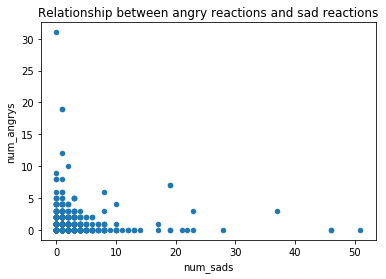

In [29]:
Live.plot(kind = 'scatter', x = 'num_sads', y = 'num_angrys')
plt.title('Relationship between angry reactions and sad reactions')

Hypothesis 10: It was hypothesised that there would not be any strong correlations between the number of shares and reactions because one is more engaging and evoke stronger emotions (shares) than the other (reactions).

The hypothesis was supported because the relationship is not evident from first glance due to the weak positive correlation.

Text(0.5,1,'Relationship between shares and reactions')

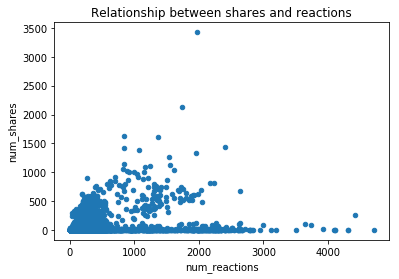

In [30]:
Live.plot(kind = 'scatter', x = 'num_reactions', y = 'num_shares')
plt.title('Relationship between shares and reactions')

# Data Modelling

Clustering creates unique groups. Exploratory analysis of the different clusters are explored with descriptve statistics to determine the best clusters that have the highest number of shares.

Preparing the data

In [31]:
Live = Live_cleaned

# dropping variables not used in the df
Live = Live.drop(["year", "qtr", "hour"], axis = "columns") # without month
Live = Live.drop(['status_published'], axis = 1)
Live = Live.drop(['month'], axis = 1) 
Live.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [32]:
# remove the variable we want to evaluate as including it will bias the clustering
target = Live['status_type'] # set the type of status (video, photo, link or status) as target because 
df = Live # rename the dataframe
df = df.drop(['status_type'], axis = 1) # delete status type as we already set to target


In [33]:
# normalise the data
from sklearn.preprocessing import StandardScaler # scale down the values to sd = 1 mean = 0
# from sklearn.preprocessing import MinMaxScaler # another option that scales values between 0 and 1

# normalise the data as they were from different ranges 
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df) 
scaled_data # now has a std of 1 and mean of 0 therefore any negative value is below the mean?

C:\Users\3hoan\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\3hoan\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


array([[ 0.64610394,  0.32335035,  1.6868788 , ...,  0.07671305,
         0.47357035, -0.15574803],
       [-0.17319166, -0.25220622, -0.3041444 , ..., -0.17600986,
        -0.152587  , -0.15574803],
       [-0.00673846,  0.01308938,  0.12901714, ...,  0.07671305,
        -0.152587  , -0.15574803],
       ...,
       [-0.49312768, -0.25220622, -0.3041444 , ..., -0.17600986,
        -0.152587  , -0.15574803],
       [ 0.26131603, -0.23871662, -0.13695924, ..., -0.17600986,
        -0.152587  , -0.15574803],
       [-0.46070173, -0.25220622, -0.3041444 , ..., -0.17600986,
        -0.152587  , -0.15574803]])

In [34]:
print(scaled_data.std()) # std of 1
print(scaled_data.mean()) # mean of 0 

1.0
-1.1198467072657214e-18


In [35]:
data = scaled_data

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

K-means with 4 clusters for the four status types

In [37]:
# k means

K_dataset_1 = 4
km_1 = KMeans(n_clusters=K_dataset_1)
labels_1 = km_1.fit(data).labels_

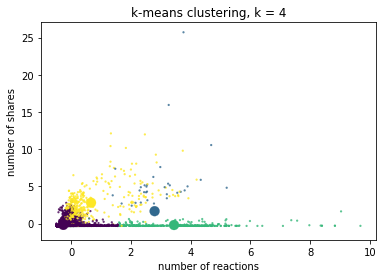

In [38]:
plt.scatter(data[:,0], data[:,2], c=labels_1, alpha=0.8, s = 5.0, lw = 0)
plt.scatter(km_1.cluster_centers_[:,0], km_1.cluster_centers_[:,1], s=100, c=np.unique(labels_1), lw=0.2)
plt.title('k-means clustering, k = 4')
plt.xlabel('number of reactions')
plt.ylabel('number of shares')
plt.show()

In [39]:
# return back to df
df = pd.DataFrame(data=data)

In [40]:
# rename variables
df.columns = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']

In [41]:
from sklearn import cluster
import pandas as pd
import numpy as np

# build clustering model
# The k means model is built, where the argument k = 4; the remaining arguments keep their default values

model = cluster.KMeans(n_clusters = 4, random_state=23)
# n_clusters = 4 clusters, for each of the status types
# random_state = 24 determines random number generation for centroid initialization (the seed?)

fit = model.fit(df) # fit the model we created

df["cluster"] = fit.predict(df)
df["target"] = target
df["c"] = "count"
clustering_result = df[["cluster", "target", "c"]].groupby(["cluster", "target"]).agg("count")
print(clustering_result) # 356 videos that were more different 



                   c
cluster target      
0       link      49
        photo   4051
        status   295
        video   1869
1       link      14
        photo    212
        status    70
        video     76
2       photo      1
        video     33
3       photo     24
        video    356


In [42]:
cluster_three = df[df['cluster'] == 3] 
cluster_three.describe() 
# average engagement metrics
# reactions 0.667
# num comments 2.814
# num shares = 2.668

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.0
mean,0.666623,2.814449,2.668292,0.451583,2.373032,0.288553,1.188694,1.335361,1.651117,3.0
std,0.924916,2.941769,1.996894,0.818266,1.939980,0.694315,1.511841,3.394311,3.549268,0.0
min,-0.395850,-0.252206,-0.304144,-0.391694,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748,3.0
25%,0.075407,1.039986,1.426602,-0.082977,0.932481,-0.033187,0.329436,-0.152587,-0.155748,3.0
50%,0.265639,1.798214,2.264428,0.087791,2.058323,0.081504,0.834882,0.473570,1.220221,3.0
75%,0.838498,4.037208,3.544914,0.630132,3.290494,0.310888,1.593051,1.099728,2.596191,3.0
max,4.199988,23.343365,12.128352,3.450862,11.740561,6.160161,14.229196,31.781438,42.499304,3.0


In [43]:
cluster_three.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster,target,c
6,0.589899,0.438012,0.243007,0.451577,1.432855,0.999037,0.329436,-0.152587,3.972160,3,video,count
99,2.730011,1.972455,5.418147,2.487441,3.159146,0.884346,0.582159,4.856672,1.220221,3,video,count
107,-0.086722,-0.252206,-0.068565,-0.097995,-0.318454,-0.147879,-0.176010,11.744403,-0.155748,3,photo,count
128,0.989819,-0.252206,-0.304144,0.927724,0.532182,-0.147879,-0.176010,13.622875,-0.155748,3,video,count
198,0.736897,0.746025,0.508983,0.542801,2.358547,-0.033187,0.076713,0.473570,2.596191,3,video,count


In [44]:
df['cluster'].value_counts() # shows that it was difficult to cluster possibily due to imbalance in the data

0    6264
3     380
1     372
2      34
Name: cluster, dtype: int64

Trying with k = 6

In [45]:
# 6 clusters was able to find a cluster with 645 videos and another with 130 videos,
df = pd.DataFrame(data=data)
df.columns = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
model = cluster.KMeans(n_clusters = 6, random_state=23)
fit = model.fit(df)
df["cluster"] = fit.predict(df)
df["target"] = target
df["c"] = "count"
clustering_result = df[["cluster", "target", "c"]].groupby(["cluster", "target"]).agg("count")
print(clustering_result)

                   c
cluster target      
0       link      49
        photo   4030
        status   287
        video   1454
1       photo     11
        video      3
2       video     25
3       link      14
        photo    222
        status    78
        video     77
4       photo     19
        video    645
5       photo      6
        video    130


In [46]:
# K means of 6
cluster_four = df[df['cluster'] == 4] 
cluster_four.describe() 
# average engagement metrics
# reactions 0.08595
# num comments 1.05253
# num shares = 1.409584
# k means of 6th can separate 6 clusters better but k means of 4 seperates highly engaging videos better. 
# It is arguable more important to find meaningful clusters that can discover highly engaging content. 

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster
count,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.0
mean,0.085952,1.005253,1.409584,-0.038926,1.349020,0.022086,0.578733,0.276482,0.557104,4.0
std,0.397565,1.094380,1.008056,0.369577,0.923164,0.219020,1.104121,0.816451,1.391225,0.0
min,-0.395850,-0.249958,-0.304144,-0.391694,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748,4.0
25%,-0.125634,0.258994,0.795858,-0.224820,0.726077,-0.147879,0.076713,-0.152587,-0.155748,4.0
50%,-0.003496,0.712301,1.234719,-0.131370,1.207687,-0.033187,0.329436,-0.152587,-0.155748,4.0
75%,0.151068,1.293197,1.833166,0.002129,1.858173,0.081504,0.834882,0.473570,1.220221,4.0
max,2.835936,5.928282,9.271005,2.903514,5.185661,2.260645,14.229196,6.108986,13.603946,4.0


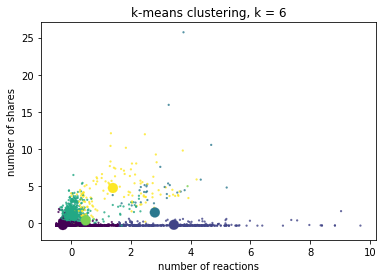

In [47]:
# visualise 6 cluster
K_dataset_1 = 6
km_1 = KMeans(n_clusters=K_dataset_1)
labels_1 = km_1.fit(data).labels_


plt.scatter(data[:,0], data[:,2], c=labels_1, alpha=0.8, s = 5.0, lw = 0)
plt.scatter(km_1.cluster_centers_[:,0], km_1.cluster_centers_[:,1], s=100, c=np.unique(labels_1), lw=0.2)

plt.title('k-means clustering, k = 6')
plt.xlabel('number of reactions')
plt.ylabel('number of shares')
plt.show()
            

# DBSCAN 

In [48]:
# lets try DBSCAN
data = scaled_data # standardised data from earlier

In [49]:
df = pd.DataFrame(data=data)
df.columns = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
df.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0.646104,0.323350,1.686879,0.482727,1.983266,0.196196,0.076713,0.473570,-0.155748
1,-0.173192,-0.252206,-0.304144,-0.144720,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748
2,-0.006738,0.013089,0.129017,-0.024571,0.206938,-0.033187,0.076713,-0.152587,-0.155748
3,-0.257499,-0.252206,-0.304144,-0.231495,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748
4,-0.037003,-0.252206,-0.304144,-0.024571,-0.093286,-0.147879,-0.176010,-0.152587,-0.155748


First try, randomly modelling with paramters eps = 0.5, min samples = 10

In [50]:
from sklearn import cluster
model = cluster.DBSCAN(eps = 0.5, min_samples=10) # default 0.4
results = model.fit(df)
df['cluster'] = results.labels_
df['target'] = target # target variable we saved earlier
df['c'] = 'fill' # stored for later
df.head()


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster,target,c
0,0.646104,0.323350,1.686879,0.482727,1.983266,0.196196,0.076713,0.473570,-0.155748,-1,video,fill
1,-0.173192,-0.252206,-0.304144,-0.144720,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748,0,photo,fill
2,-0.006738,0.013089,0.129017,-0.024571,0.206938,-0.033187,0.076713,-0.152587,-0.155748,0,video,fill
3,-0.257499,-0.252206,-0.304144,-0.231495,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748,0,photo,fill
4,-0.037003,-0.252206,-0.304144,-0.024571,-0.093286,-0.147879,-0.176010,-0.152587,-0.155748,0,photo,fill


In [51]:
clustering_result = df[["cluster", "target", "c"]].groupby(["cluster", "target"]).agg("count")
print(clustering_result)

                   c
cluster target      
-1      photo    177
        status    27
        video    769
 0      link      63
        photo   4043
        status   315
        video   1540
 1      photo     38
        status    11
        video     15
 2      photo      3
        video      7
 3      photo     11
        status     4
        video      2
 4      photo      7
        status     5
 5      photo      9
        status     3
        video      1


In [52]:
cluster_negative_one = df[df['cluster'] == -1] 
cluster_negative_one.describe() 

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster
count,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.0
mean,0.693806,1.336480,1.510126,0.554155,1.516216,0.634806,0.940335,0.833305,0.958603,-1.0
std,1.434522,2.252945,2.054089,1.410817,2.045897,2.581348,2.478988,2.503651,2.483242,0.0
min,-0.452055,-0.252206,-0.304144,-0.442869,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748,-1.0
25%,-0.088884,0.063675,0.037825,-0.191445,0.156901,-0.147879,0.076713,-0.152587,-0.155748,-1.0
50%,0.122965,0.704432,1.033337,-0.015671,0.957500,0.081504,0.329436,0.473570,-0.155748,-1.0
75%,0.708794,1.592498,2.218832,0.562826,2.133379,0.310888,1.087605,1.099728,1.220221,-1.0
max,9.684296,23.343365,25.715945,10.001228,16.118835,31.736395,39.501488,31.781438,42.499304,-1.0


In [53]:
cluster_one = df[df['cluster'] == 1] 
cluster_one.describe() 

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,6.400000e+01,64.000000,64.0
mean,-0.277056,-0.190888,-0.247743,-0.267407,-0.201961,-0.013475,-0.108880,4.735704e-01,-0.155748,1.0
std,0.178256,0.111602,0.123280,0.174079,0.166148,0.205933,0.150978,3.916499e-16,0.000000,0.0
min,-0.490966,-0.252206,-0.304144,-0.474019,-0.318454,-0.147879,-0.176010,4.735704e-01,-0.155748,1.0
25%,-0.420710,-0.248834,-0.304144,-0.406156,-0.318454,-0.147879,-0.176010,4.735704e-01,-0.155748,1.0
50%,-0.298572,-0.240403,-0.296545,-0.284895,-0.293436,-0.147879,-0.176010,4.735704e-01,-0.155748,1.0
75%,-0.205618,-0.200777,-0.281346,-0.211470,-0.162087,0.081504,-0.176010,4.735704e-01,-0.155748,1.0
max,0.319683,0.243537,0.220209,0.338102,0.307013,0.540271,0.329436,4.735704e-01,-0.155748,1.0


In [54]:
data = scaled_data

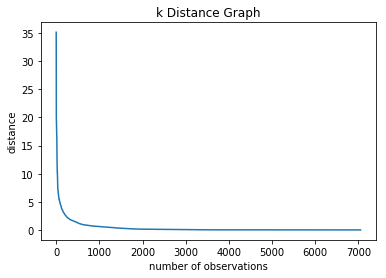

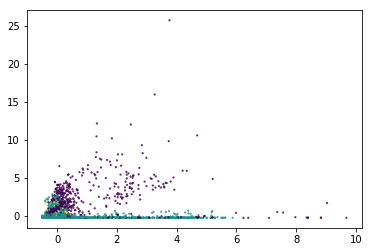

In [55]:
# only works okay.. we want a k distance graph to define our eps parameter
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors().fit(data)
distances, indices = nbrs.kneighbors(data, 20)
kDis = distances[:, 10]
kDis.sort()
kDis = kDis[range(len(kDis)-1, 0, -1)]
plt.plot(range(0,len(kDis)), kDis)
plt.xlabel('number of observations')
plt.ylabel('distance')
plt.title('k Distance Graph')
plt.show()

from sklearn.cluster import DBSCAN
dbs_1 = DBSCAN(eps=1, min_samples = 30) # eps between (2 and 2.5) 2.3 and 4 looks the best so far
labels_1 = dbs_1.fit(data).labels_

plt.scatter(data[:,0], data[:,2], c = labels_1, alpha = 0.8, s = 5, lw = 0)

# we want it to find more than 2 clusters (ideally 4 clusters)

Change parameters, modelling with paramters eps = 1, min_samples=30

In [56]:
# change parameters

df = pd.DataFrame(data=data)

from sklearn import cluster
model = cluster.DBSCAN(eps = 1, min_samples=30) # default 0.4
results = model.fit(df)
df['cluster'] = results.labels_
df['target'] = target # target variable we saved earlier
df['c'] = 'fill' # stored for later
df.head()

clustering_result = df[["cluster", "target", "c"]].groupby(["cluster", "target"]).agg("count")
print(clustering_result)



                   c
cluster target      
-1      photo    104
        status    22
        video    435
 0      link      63
        photo   4178
        status   342
        video   1780
 1      photo      6
        status     1
        video    119


In [57]:
df.columns = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys', 'cluster', 'target', 'c']

In [58]:
cluster_negative_one = df[df['cluster'] == -1] 
cluster_negative_one.describe() 
# (more reactions than k means but less in shares and comments meaning not as invested?)

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.0
mean,1.002716,2.015695,2.057566,0.812156,2.021530,1.050761,1.428172,1.331886,1.492472,-1.0
std,1.645367,2.743458,2.481494,1.608597,2.490271,3.327240,3.156169,3.179701,3.122050,0.0
min,-0.441246,-0.252206,-0.304144,-0.429519,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748,-1.0
25%,0.019202,0.125503,-0.022969,-0.104670,0.181920,-0.033187,0.076713,-0.152587,-0.155748,-1.0
50%,0.304551,1.274368,1.641283,0.140078,1.232705,0.196196,0.582159,0.473570,1.220221,-1.0
75%,1.649147,2.713259,3.297936,1.357147,3.009033,0.540271,1.593051,1.099728,2.596191,-1.0
max,9.684296,23.343365,25.715945,10.001228,16.118835,31.736395,39.501488,31.781438,42.499304,-1.0


In [59]:
cluster_one = df[df['cluster'] == 1] 
cluster_one.describe() 

# this video cluster is different to the other cluster because all the videos have low number of shares and reactions

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,1.260000e+02,126.0
mean,-0.077046,0.315829,0.704093,-0.155563,0.822081,-0.032277,0.195052,0.026315,1.220221e+00,1.0
std,0.166285,0.399604,0.613628,0.151468,0.630394,0.133355,0.348261,0.305289,2.229310e-15,0.0
min,-0.452055,-0.251082,-0.304144,-0.442869,-0.318454,-0.147879,-0.176010,-0.152587,1.220221e+00,1.0
25%,-0.184000,0.070420,0.222109,-0.258751,0.407088,-0.147879,-0.176010,-0.152587,1.220221e+00,1.0
50%,-0.070509,0.253654,0.793958,-0.191445,0.794878,-0.033187,0.076713,-0.152587,1.220221e+00,1.0
75%,0.014879,0.500964,1.189123,-0.077971,1.301507,0.081504,0.329436,0.473570,1.220221e+00,1.0
max,0.416961,1.422753,1.998451,0.449352,2.358547,0.425579,1.087605,1.099728,1.220221e+00,1.0


In [60]:
# check cluster 0
cluster_0 = df[df['cluster'] == 0] 
cluster_0.describe() # this cluster is kind of like the middle ground where the majority of values are

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster
count,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6.363000e+03,6363.0
mean,-0.086880,-0.183970,-0.195350,-0.068524,-0.194509,-0.092002,-0.129779,-0.117948,-1.557480e-01,0.0
std,0.879190,0.219987,0.370696,0.903652,0.378005,0.165802,0.177407,0.214491,1.257426e-14,0.0
min,-0.497451,-0.252206,-0.304144,-0.478469,-0.318454,-0.147879,-0.176010,-0.152587,-1.557480e-01,0.0
25%,-0.465025,-0.252206,-0.304144,-0.445094,-0.318454,-0.147879,-0.176010,-0.152587,-1.557480e-01,0.0
50%,-0.398012,-0.248834,-0.304144,-0.378344,-0.318454,-0.147879,-0.176010,-0.152587,-1.557480e-01,0.0
75%,-0.124553,-0.237592,-0.288946,-0.144720,-0.268417,-0.147879,-0.176010,-0.152587,-1.557480e-01,0.0
max,5.873167,1.947724,2.933168,6.078573,3.059071,2.260645,1.845773,2.978200,-1.557480e-01,0.0


In [61]:
df = df.drop(['target', 'c','cluster'], axis = 1)

In [62]:
# vislaising DBSCAN

from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

# set parameters
dbsc = DBSCAN(eps = 1, min_samples = 30).fit(df) 

In [63]:
labels = dbsc.labels_
core_samples = np.zeros_like(labels,dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

In [64]:
# add in the dummy target components to visualise the the effect of DBSCAN
# join back into Live
df = pd.concat([df, dummies_status_type],axis = 1)

In [65]:
filter=list(core_samples)
df["Filter"]=filter

In [66]:
# num_reactions	num_comments	num_shares	num_likes	num_loves	num_wows	num_hahas	num_sads	num_angrys
df.columns = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys', 'link', 'photo', 'status', 'video', 'Filter']

In [67]:
df['Filter'].value_counts() # false are outliers so to speak

True     6275
False     775
Name: Filter, dtype: int64

Text(0.5,1,'eps 1, min_samples 30, ')

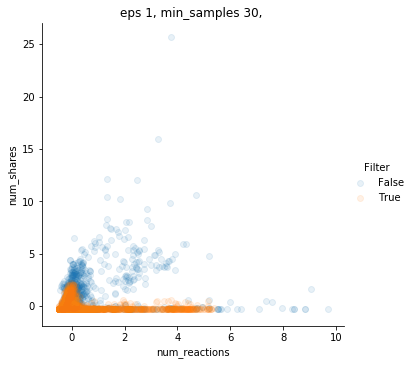

In [68]:
import seaborn as sns
sns.lmplot("num_reactions", "num_shares",data=df,fit_reg=False,hue="Filter",height=5, scatter_kws={'alpha':0.1})
# plt.title('eps. 35, min_samples 2, shows transparency outliers as non filtered')
plt.title('eps 1, min_samples 30, ')


Text(0.5,1,'DBSCAN can split exceptionally high shares')

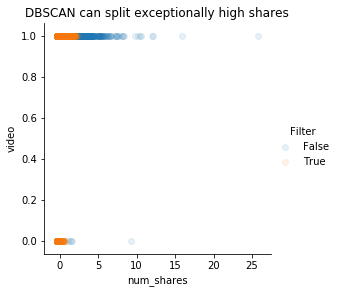

In [69]:
# was able to split exceedingly high shares (normalised version)

import seaborn as sns
sns.lmplot("num_shares", "video",data=df,fit_reg=False,hue="Filter",height=4, scatter_kws={'alpha':0.1})
# plt.title('eps. 35, min_samples 2, shows transparency outliers as non filtered')
plt.title('DBSCAN can split exceptionally high shares')

Text(0.5,1,'DBSCAN can split exceptionally high reactions, ')

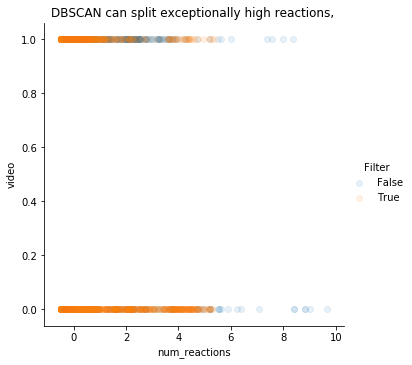

In [70]:
import seaborn as sns
sns.lmplot("num_reactions", "video",data=df,fit_reg=False,hue="Filter",height=5, scatter_kws={'alpha':0.1})
# plt.title('eps. 35, min_samples 2, shows transparency outliers as non filtered')
plt.title('DBSCAN can split exceptionally high reactions, ')

Text(0.5,1,'eps 1, min_samples 30, ')

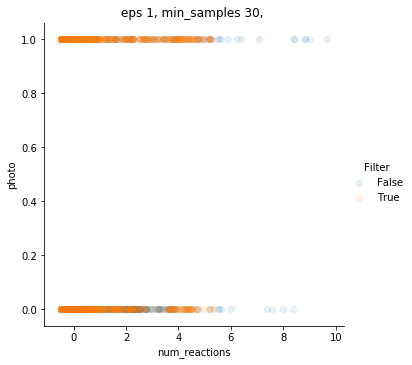

In [71]:
import seaborn as sns
sns.lmplot("num_reactions", "photo",data=df,fit_reg=False,hue="Filter",height=5, scatter_kws={'alpha':0.1})
# plt.title('eps. 35, min_samples 2, shows transparency outliers as non filtered')
plt.title('eps 1, min_samples 30, ')
